In this lab session, we will be taking a look at the second of two algorithms where we will be combining our quantum system with some classical optimization
techniques. The Quantum Approximate Optimization Algorithm is a very promising quantum algorithm, one which has the potential for real speedups on near
term quantum computers. Since its first proposal in 2014
, the solving power of QAOA has been demonstrated on numerous problems and continues to be
improved and refined.

In order to make sure that all cells of code run properly throughout this lesson, please run the following cells of code below:

In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings('ignore')
import math as m
import matplotlib
import matplotlib.pyplot as plt

S_simulator = Aer.backends(name='statevector_simulator')[0]

M_simulator = Aer.backends(name='qasm_simulator')[0]

In [2]:
def Binary(N,total,LSB):
  '''
  Input: N (integer) total (integer) LSB (string)
  Returns the base-2 binary equivilant of N according to left or right least significant bit notation
  '''
  qubits = int(m.log(total, 2))
  b_num = np.zeros(qubits)
  for i in np.arange(qubits):
    if( N/((2)**(qubits-i-1)) >= 1):
      if (LSB == 'R'):
        b_num[i] = 1
      if(LSB== 'L'):
        b_num[int(qubits-(i+1))] = 1
      N = N - 2**(qubits-i-1)
  B = []
  for j in np.arange(len(b_num)):
    B.append(int(b_num[j]))
  return B

In [3]:
'''
Do not worry about the length of this code block.
You dont need to understand this code.
It is only to help you view the wavefunction in a better way
'''
import numpy as np
import scipy as sci

def Wavefunction( obj, *args, **kwargs):
  '''
  Displays the wavefunction of the quantum system
  '''
  if(type(obj) == QuantumCircuit ):
    statevec = execute( obj, S_simulator, shots=1 ).result().get_statevector()
  if(type(obj) == np.ndarray):
    statevec = obj
  sys = False
  NL = False
  dec = 5
  if 'precision' in kwargs:
    dec = int(kwargs['precision'] )
  if 'column' in kwargs:
    NL = kwargs['column']
  if 'systems' in kwargs:
    systems=kwargs['systems']
    sys = True
    last_sys= int(len(systems)-1)
    show_systems = []
    for s_chk in np.arange(len(systems)):
      if( type(systems [s_chk])!=int ):
        raise Exception('systems must be an array of all integers')
    if 'show_systems' in kwargs:
      show_systems = kwargs['show_systems']
      if(len(systems)!=len (show_systems) ):
        raise Exception('systems and show_systems need to be arrays of equal length')
      for ls in np.arange(len(show_systems)):
        if((show_systems [ ls]!=True) and (show_systems [ ls] !=False)):
          raise Exception('show_systems must be an array of Truth Values')
        if(show_systems [ ls] ==True):
          last_sys= int(ls)

    else:
      for ss in np.arange(len(systems)):
        show_systems.append(True)
  wavefunction = ''
  qubits = int(m.log(len(statevec),2))
  for i in np.arange( int(len(statevec)) ):
    value = round(statevec[int(i)].real, dec) + round(statevec[int(i)].imag, dec) * 1j
    if( (value.real!=0) or (value.imag!=0)):
      state= list(Binary(int(i), int(2**qubits),'L'))
      state_str = ''
      if( sys == True ):    #Systems and Show Systems
        k = 0
        for s in np.arange(len(systems)):
          if(show_systems [s]==True):
            if(int(s)!=last_sys):
              state.insert(int(k+systems [s]), '>|' )
              k = int(k+systems[s]+1)
            else:
              k = int(k+systems[s])
          else:
            for s2 in np.arange(systems [s]):
              del state[int(k)]
      for j in np.arange(len(state)):
        if(type(state[j])!=str):
          state_str = state_str+str(int(state[j]))
        else:
          state_str = state_str+state[j]
      if ((value.real!=0) and (value.imag!=0)):
        if( value.imag> 0):
          wavefunction = wavefunction + str(value.real) + '+' + str(value.imag) + 'j |' + state_str + '>   '
        else:
          wavefunction = wavefunction + str(value.real) +'' + str(value.imag) + 'j |' + state_str + '>    '
      if( (value.real!=0) and (value.imag==0)):
        wavefunction = wavefunction +str(value.real)+' |'+state_str +'>     '
      if((value.real==0) and (value.imag!=0)):
        wavefunction = wavefunction +str(value.imag)+'j |'+state_str+ '>     '
      if (NL):
        wavefunction = wavefunction + '\n'
  print(wavefunction)


In [4]:
def Measurement(quantumcircuit, **kwargs):
  '''
  Executes a measurement(s) of a QuantumCircuit object for tidier printing
  Keyword Arguments:
  shots (integer) - number of trials to execute for the measurement(s)
  return_M (Bool) - indictaes whether to return the Dictionary object containng measurement resul
  print_M (Bool) - indictaes whether to print the measurement results
  column (Bool) - prints each state in a vertical column
  '''
  p_M = True
  S=1
  ret = False
  NL = False
  if 'shots' in kwargs:
    S = int(kwargs['shots'])
  if 'return_M' in kwargs:
    ret = kwargs['return_M']
  if 'print_M' in kwargs:
    p_M = kwargs['print_M']
  if 'column' in kwargs:
    NL = kwargs['column']
  M1 = execute(quantumcircuit, M_simulator, shots=S).result().get_counts(quantumcircuit)
  M2 = {}
  k1 = list(M1.keys())
  v1 = list(M1.values())
  for k in np.arange(len(k1)):
    key_list = list(k1[k])
    new_key = ''
    for j in np.arange(len(key_list)):
      new_key = new_key+key_list[len(key_list)-(j+1)]
    M2[new_key] = v1[k]
  if(p_M):
    k2 = list(M2.keys())
    v2 = list(M2.values())
    measurements = ''
    for i in np.arange( len(k2) ):
      m_str = str(v2[i])+'|'
      for j in np.arange(len(k2[i])):
        if( k2[i][j] == '0' ):
          m_str = m_str+'0'
        if( k2[i][j] == '1' ):
          m_str = m_str+'1'
        if( k2[i][j] == ' ' ):
          m_str = m_str+'>|'
      m_str = m_str+'>   '
      if(NL):
        m_str = m_str + '\n'
      measurements = measurements + m_str
    print(measurements)
  if(ret):
    return M2

In [5]:
def Heatmap(data, show_text, show_ticks, ax, cmap, cbarlabel, **kwargs):
  '''
  Input:
  data (array)
  show_text (Bool)
  show_ticks (Bool)
  ax (Matplotlib subplot)
  cmap (string)
  Takes in data and creates a 2D Heatmap
  '''
  valfmt="{x:.1f}"
  textcolors=["black", "white"]
  threshold=None
  cbar_kw={}
  #----------------------------
  if not ax:
    ax = plt.gca()
  im = ax.imshow(data, cmap=cmap, **kwargs)
  cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
  cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
  ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
  if( show_ticks == True ):
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.tick_params(which="minor", bottom=False, left=False)
  if threshold is not None:
    threshold = im.norm(threshold)
  else:
    threshold = im.norm(data.max())/2.
  kw = dict(horizontalalignment="center", verticalalignment="center")
  if isinstance(valfmt, str):
    valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
  if( show_text == True ):
    for i in range(data.shape[0]):
      for j in range(data.shape[1]):
        kw.update(color=textcolors[int(im.norm(data[i, j]) < threshold)])
        text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)

# **Difficulty With Optimization Problems**
***

In order to give the proper context for QAOA, we must first discuss the types of problems which it promises to help solve quicker. Optimization problems are
very common in computer science, and their difficulty can range from driving instructions from point A to point B, to air traffic control keeping every plane at an
airport on schedule. Newer and better classical optimization techniques are being developed all the time, but some problems are known to be just too
computationally demanding for a classical computer.

Consider the following problem, all of your extended family has gathered for a party and you offer to take a photo of everyone. However, not everyone in your
family is on good terms with each other, and some will be very upset if they have to stand next to each other. Simultaneously, some members of your family
will be equally upset if they are not close enough to members they like. You realize that anyone whose conditions are met will give you a big smile for the
photo, but if they are not, they will frown. After collecting everyone's requests, your task is to maximize the number of smiles for the photo, based on the
following conditions:

1. Michelle, Betty, and Margaret all want to be at most 3 people away from each other
2. Cullen and Nate can't stand each other, and want to be at least 3 people away from one another
3. Clint is happy so long as he is not next to Will or Cullen
4. Nate wants to be next to Betty, but at least two people away from Michelle and Margaret

After a long sigh... you decide to try and make everyone happy by meeting their conditions. Alas, you quickly become overwhelmed by the number of
possible combinations, so you turn to your computer for help. Rather than working through all 5040 possible arrangements (7!) yourself, you instead code up
everyone's conditions, assign a happiness score for each condition met, and let your code find the best possible combination:

In [6]:
def Happiness( A ):
  '''
  Computes the total happiness score based on everyone's conditions
  '''
  happiness = 0
  for i in np.arange(len(A)):
    if( A[i] == 1):
      Mi = int(i)
    if( A[i] == 2):
      Be = int(i)
    if( A[i] == 3):
      Ma = int(i)
    if( A[i] == 4):
      Cu = int(i)
    if( A[i] == 5):
      Na = int(i)
    if( A[i] == 6):
      Cl = int(i)
    if( A[i] == 7):
      Wi = int(i)
  if( (abs(Mi - Be)<=3) and (abs(Mi - Ma)<=3) ): # Michelle
    happiness += 1
  if( (abs(Be - Mi)<=3) and (abs(Be - Ma)<=3) ): # Betty
    happiness += 1
  if( (abs(Ma - Mi)<=3) and (abs(Ma - Be)<=3) ): # Margaret
    happiness += 1
  if( abs(Cu - Na)>=3 ): # Cullen
    happiness += 1
  if( (abs(Na - Cu)>=3) and (abs(Na - Be)==1) ): # Nate
    happiness += 1
  if( (abs(Cl - Cu)>1) and (abs(Cl - Wi)>1) ): # Clint
    happiness += 1
  happiness += 1 # Will
  return happiness


In [7]:
import itertools
perm = list(itertools.permutations([1, 2, 3, 4, 5, 6, 7]))
All_Happy = []
all_perm = 0
for i in list(perm):
  all_perm = all_perm + 1
  if( Happiness(list(i)) == 7 ):
    All_Happy.append( list(i) )
print('Total Combinations Where Everyone Is Happy: ',len(All_Happy))

Total Combinations Where Everyone Is Happy:  72


Upon running your code above, you are pleasantly surprised to find a total of 72 possible arrangements for your family members. You pick one, line everyone
up for the photo, and are gratefully met with 7 big smiles.
In the simple exercise of arranging family members, the size of the problem was small enough such that our classical code could work through all 5040
possible combinations with ease. However, each additional variable in the problem increases the space of all possible combinations by more and more:

8! = 40,320

9! = 362,880

10! = 3,628,800

As we can see, it doesn't take long before the classical brute force method is no longer viable, especially when we want to consider real-world problems with
100's or 1000's of variables. Luckily, computer scientists have developed a long list of techniques for efficiently solving optimization problems, and getting
longer all the time. The hope then is that the assistance of quantum computers will unlock new techniques, allowing for solutions to previously unsolvable
problems.

# **Setting Up a QAOA Problem**
***

Now, the example above is designed to illustrate the style of optimization problems which we are planning to solve using QAOA. Specifically, we are given
some set of variables which make up a large space of possible combinations, and our problem is to find the combination which optimizes some criteria. We
will refer to these criteria as our "Cost Function", C(z), where z is the set of all variables which we need to optimize:

$$𝐳 ≡ {𝑧_1 , 𝑧_2 ,..., 𝑧_𝑛 } \space where \space   𝑧_𝑗 ∈ \{+1,−1\}$$

For example, consider the following cost function and its table of possible values:

$$𝐂(𝐳) = 3𝑧_1 𝑧_2 − 𝑧_2 𝑧_3$$

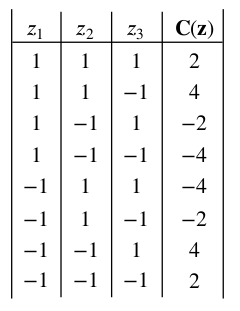

Given a cost function like 𝐂(𝐳) above, the first question we should ask is how do we translate it into a quantum system? Just like how we were able to
encode all of the various criteria in the photograph example into if-statements about distances ( | person 𝐴 - person 𝐵 | ) , we similarly need a way of
encoding 𝐂(𝐳) into quantum. The answer is that 𝐂(𝐳) will become an operator 𝐂 , which when it acts on a quantum state will return a value corresponding to the cost function. More specifically, 𝐂 is a diagonal matrix in the computational basis, where each element along the diagonal corresponds to a value of 𝐂(𝐳)
from a unique combination of 𝐳 :

$$ 𝐂|𝐳⟩ = 𝐂| 𝑧_1 𝑧_2 ... 𝑧_𝑛 ⟩ = 𝐂(𝐳)| 𝑧_1 𝑧_2 ... 𝑧_𝑛 ⟩ $$


Using our table of values for 𝐂(𝐳) from above, we could construct the matrix 𝐂 by placing all of the 𝐂(𝐳) values along the diagonal. However, let's derive 𝐂
for this example another way. In case you were curious as to why we chose '𝑧' to be the variable in our cost functions, it's because when we convert 𝐂(𝐳) into
an operator, we simply replace each $𝑧_𝑗$ with the operator $𝑍_𝑗$ . And, in agreement with our condition on each $𝑧_𝑗$ ∈ {+1,−1} , the 𝑍 operator similarly
returns the values ±1 when acting on the states |0⟩ and |1⟩ respectively. By replacing each $𝑧_𝑗$ with $𝑍_𝑗$ , we can construct the matrix operator corresponding
to 𝐂(𝐙):

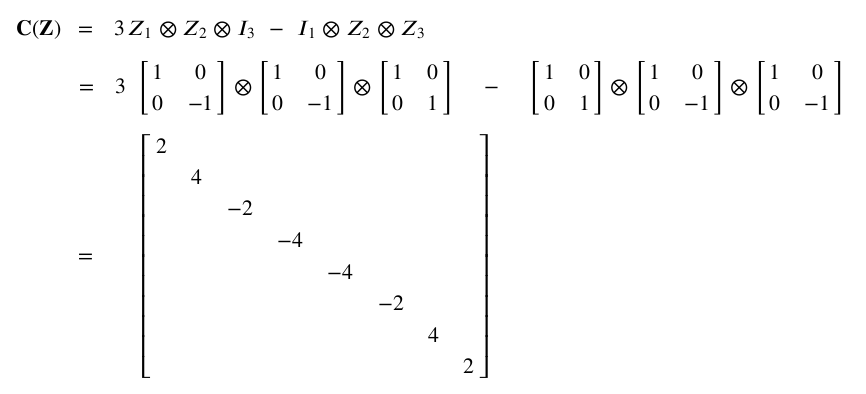

Sure enough, the diagonal elements of the matrix above correspond exactly to the values from our table earlier (and in the same order as well). There is of
course, one major problem with the matrix operator shown above, preventing us from physically implementing it on a real quantum system. And that problem
is the fact that 𝐂(𝐙)
is not a unitary operation. Parts of 𝐂(𝐙)
are valid quantum operations we can perform: $Z_1 ⊗ Z_2 ⊗ I_3$ and $I_1 ⊗ Z_2 ⊗ Z_3$, but their combination is not.

Given that we cannot physically implement  𝐂(𝐙)
, you may start to worry about the viability of using a quantum system to solve our optimization problem.
Rightfully so, if we were to limit ourselves to only problems whereby the cost function perfectly corresponded with a unitary operator, the list of solvable
problems would be quite small. Luckily however this is not the case. As we shall see in the coming section, QAOA cleverly encodes cost functions in a way
such that the resulting quantum operator is always unitary!

# **𝑈(𝐂,𝛾) The Phase Operator**
***

Although we were unable to use our cost function directly as an operator, the condition we put on 𝐂(𝐙) to be a diagonal matrix is actually one required of the operator we will
be using. Specifically, we will be implementing 𝑈(𝐂,𝛾), which is defined as:

$$ 𝑈(𝐂,𝛾) = 𝑒^{−𝑖𝛾𝐂} $$

As a quick math reminder, the exponentiation of a matrix is as follows:

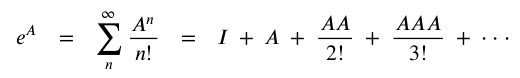


Example:


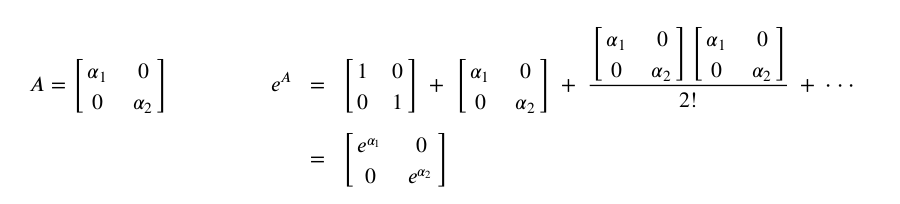

The example above might take a moment to fully digest, especially if you've never seen matrix exponentiation before. To help complete the exercise, and
because it is relevant to our next discussion:

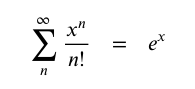

As you can see, the form for matrix exponentiation is actually the same formula for regular numbers as well. Now, the reason this is relevant is because of the
way in which diagonal matrices undergo matrix exponentiation. The key here that no matter what power it is raised to, a diagonal matrix will remain diagonal.
And not only that, the diagonal elements do not mix, but rather simply get raised to the power of the operation:

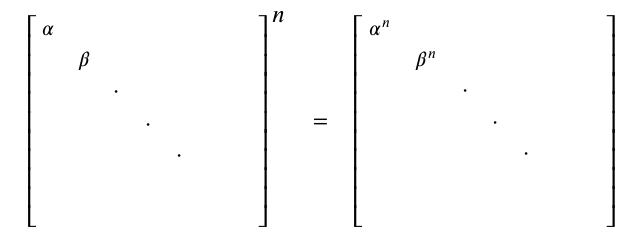

With this in hand, I encourage you to work through the example above and verify for yourself that you indeed get the diagonal elements $e^{α_1}$ and $e^{α_2}$.

Returning now to 𝑈(𝐂,𝛾), let's discuss why this operator remedies the problem we encounter earlier with 𝐂(𝐙). So long as we meet the condition on our cost function 𝐂(𝐙) that its resulting matrix operator is diagonal, we are guaranteed that 𝑈(𝐂,𝛾) will also be diagonal, which is nice. But more importantly, because 𝑈(𝐂,𝛾) contains the imaginary element i in the exponential, this i carries through to all of the elements of 𝑈(𝐂,𝛾) as well:

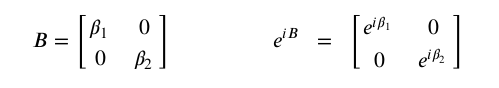

This inclusion of the imaginary element 𝑖, in combination with 𝐂(𝑍) being diagonal, is what guarantees that our 𝑈(𝐂 ,𝛾 ) operator will always be unitary. In
essence, each diagonal element of 𝐂(𝑍) becomes a corresponding phase term in 𝑈(𝐂 ,𝛾 ). To see this, let's return to our cost function example from earlier,
and see what the corresponding 𝑈(𝐂 ,𝛾 ) matrix looks like:

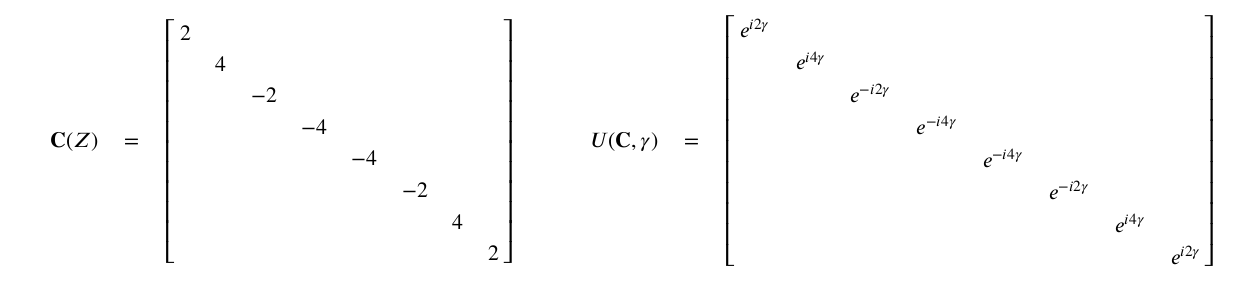

If we now consider how this matrix would operate on a quantum state, we can see that every term will pick up some phase $𝑒^{𝑖𝑥𝛾}$ , which is certainly unitary!

By now you may be wondering what this extra 𝛾 term is that comes with our 𝑈 (𝐂 ,𝛾 ) operator. Why not just perform $𝑒^{𝑖𝐂}$ since it already contains all of our
cost function's information? The answer is because implementing $𝑒^{𝑖𝐂}$ simply won't solve our problem. Jumping ahead a bit, there will be a second free
parameter 𝛽, coming from a separate operation, which in combination with 𝛾 will provide a platform for our QAOA to optimize. So far we've only discussed
how to encode our cost function into a quantum operator, but we've actually said nothing about how QAOA finds the optimal solution! As we shall see, the
goal of QAOA is to find a combination of 𝛾 and 𝛽, which when applied to our quantum system produces a superposition state whereby a measurement will
yield with high probability a state that solves our optimization problem.

As a final note before moving on to our second major operator, let's quickly show how one might implement 𝑈(𝐂 ,𝛾 ) as a quantum circuit. As shown above,
the most general form for 𝑈(𝐂 ,𝛾 ) is one where each diagonal element is a unique phase term. For this general case, we can implement each phase term
individually through the use of CNOT and $R_Φ$ gates, plus ancilla. For our coding example, let's implement the following matrix as a quantum circuit:

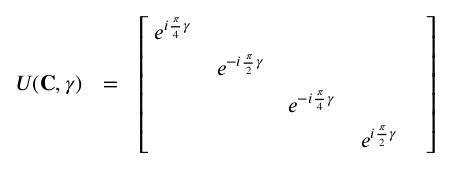

which when applied to an equal superposition state should yield:

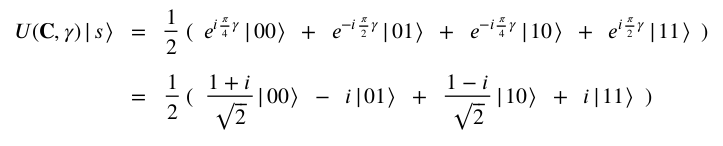

Here we have set 𝛾 = 1 for this example.


__ Initial State __
0.5 |00>|0>     0.5 |10>|0>     0.5 |01>|0>     0.5 |11>|0>     

__ After Applying The |01> Phase Term __
0.5 |00>     0.5 |10>     0.35355 |01>     0.5 |11>     0.35355 |11>     

__ Circuit Diagram __



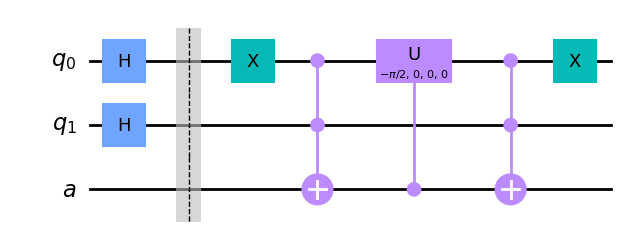

In [8]:
q = QuantumRegister(2, name = 'q')
a = QuantumRegister(1, name = 'a')
qc= QuantumCircuit(q,a, name = 'qc')
#===================================
qc.h( q[0] )
qc.h( q[1] )
qc.barrier()
print('__ Initial State __')
Wavefunction(qc, systems=[2,1])
#----------------------------------- Uc Operator
qc.x( q[0] )
qc.ccx( q[0], q[1], a[0] )

qc.cu(-m.pi/2,0,0,0,a[0], q[0] )
qc.ccx( q[0], q[1], a[0] )
qc.x( q[0] )
#-----------------------------------
print('\n__ After Applying The |01> Phase Term __')
Wavefunction(qc, systems=[2,1], show_systems=[True,False])
print('\n__ Circuit Diagram __\n')
qc.draw('mpl')

The circuit above illustrates how to implement the $e^{-i\frac{x}{2}γ}$ phase term from 𝑈(𝐂 ,𝛾 ) which falls on the |01⟩ state, shown by the gates after the barrier.
Essentially, we can use X and CCNOT gates in combination with ancilla qubits to isolate any single state, apply a phase, and then undo all of the
transformations. If you recall, this is the same technique we used in the Grover Algorithm to pick out our marked state. Here we can use this trick to mark
individual states with arbitrary phase terms:

In [9]:
q = QuantumRegister(2, name = 'q')
a = QuantumRegister(1, name = 'a')
Uc_qc= QuantumCircuit(q,a, name = 'qc')
Uc_qc.h( q[0] )
Uc_qc.h( q[1] )
print('__ Initial State __')
Wavefunction(Uc_qc, systems=[2,1])
#-------------------------------------- # |00> state
Uc_qc.x( q[0] )
Uc_qc.x( q[1] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.cu( m.pi/4,0,0,0, a[0], q[0] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.x( q[1] )
Uc_qc.x( q[0] )
#-------------------------------------- # |01> state
Uc_qc.x( q[0] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.cu( -m.pi/2,0,0,0, a[0], q[0] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.x( q[0] )
#-------------------------------------- # |10> state
Uc_qc.x( q[1] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.cu( -m.pi/4,0,0,0, a[0], q[0] )
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.x( q[1] )
#-------------------------------------- # |11> state
Uc_qc.ccx( q[0], q[1], a[0] )
Uc_qc.cu( m.pi/2,0,0,0, a[0], q[0] )
Uc_qc.ccx( q[0], q[1], a[0] )

print('\n__ After Applying U(C,gamma) __')
Wavefunction(Uc_qc, systems=[2,1])

__ Initial State __
0.5 |00>|0>     0.5 |10>|0>     0.5 |01>|0>     0.5 |11>|0>     

__ After Applying U(C,gamma) __
0.46194 |00>|0>     0.41016 |10>|0>     0.35355 |01>|0>     0.44922 |11>|0>     0.31936 |00>|1>     0.12802 |10>|1>     -0.25788 |01>|1>     0.32664 |11>|1>     


As illustrated above, this technique is applicable for any sized system, so long as you have the necessary number of additional ancilla qubits. In general
however, this technique is very costly and should typically be avoided if possible, but serves our learning purposes here just fine. In the coming examples, we
will be working with 𝑈(𝐂,𝛾) operators that are much more gate efficient to implement.

# **𝑈(𝐁,𝛽) The Mixing Operator**
***

Having just seen how to encode our cost function 𝐂(𝐙) into the unitary operator 𝑈(𝐂,𝛾) , we will now turn our attention to the second operator of QAOA: 𝑈(𝐁,𝛽). To motivate why we even need this second operation, consider the effect of 𝑈(𝐂,𝛾) applied to the even superposition state |s⟩ (which is the first step in
QAOA). Before applying 𝑈(𝐂,𝛾) we have an equal probability of measuring any state in the system, which can be thought of as the starting point for our
optimization problem. Then we apply 𝑈(𝐂,𝛾), effectively distributing phases to each state in the system based on the cost function we encoded. But although
we have achieved a quantum state representation of our cost function, a measurement on this system will still yield every state with equal probability. Thus, 𝑈(𝐂,𝛾) alone is not enough to solve our optimization problem, so we need to introduce a second operation, one that will effectively mix all of the amplitudes
together so that we get constructive and destructive interference. Hence, 𝑈(𝐁,𝛽), "The Mixing Operator", which has the following mathematical structure:

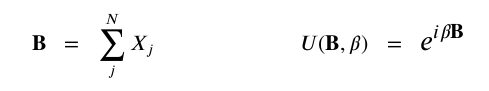

Very similar in nature to our 𝑈(𝐂,𝛾) operator, B here is composed of X gates instead of Z
gates. Consequently, when we apply matrix exponentiation to the
operator B, we no longer get a diagonal matrix operator, which in turn means that we will get amplitude mixing. This mixing operator comes with another free
parameter $β$, which we will discuss further in the next section, but essentially plays the same role as γ. Resulting from the fact that B is a linear sum of X gates, one applied to each qubit in the system, we can mathematically rewrite 𝑈(𝐁,𝛽) as follows:

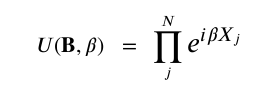

where 𝑁 is the number of qubits in the system, and each $𝑒^{𝑖𝛽𝑋_𝑗}$ term has the following structure:

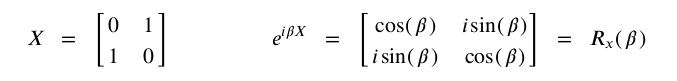

I encourage you to work through the matrix exponentiation math yourself, and you should arrive at the result that our 𝑈(𝐁 ,𝛽) operator is just a product of 𝑅𝑥(𝛽) gates. As a reminder, 𝑅𝑥(𝛽) is a single qubit gate which rotates the state of the qubit about the 𝑥̂ axis (on the Bloch Sphere) by an angle 𝛽. The fact that our 𝑈(𝐁 ,𝛽) operator turns out to be implementable using single qubit gates on each qubit is very convenient! In particular, it means that the entire 𝑈(𝐁 ,𝛽) operation can be performed with a circuit depth of one (all of the 𝑅𝑥 (𝛽) gates performed in parallel).

# **Expectation Value 𝐹 (𝛾,𝛽 )**
***

With both 𝑈(𝐂,𝛾) and 𝑈(𝐁 ,𝛽) now in hand, as well as their physical implementation into quantum circuits, we have everything we need for QAOA! Below is a
general overview of the quantum steps in a typical QAOA procedure, which we will go into further detail next:

1. Prepare the initial state of the system: $|Ψ⟩_𝑖$ = $𝐻⊗^{𝑁}$|0⟩ = |𝑠⟩
2. Choose your set of parameters 𝛾 and 𝛽
3. Apply 𝑈 (𝐁,𝛽) 𝑈 (𝐂,𝛾 )|𝑠⟩
4. Measure in the computational basis

Now, the outline shown above is not the whole story of QAOA as we shall see. Ultimately, the goal of QAOA is to minimize (or maximize depending on your
cost function) the expectation value of our cost function:



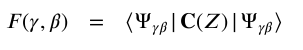

where


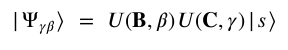

Working with expectation values in an algorithm is new to this tutorial series, and requires a bit of further explanation. First off, obtaining an expectation value
using a quantum system requires repeat measurements, enough to approximate the wavefunction in question. Working with Qiskit, we have the luxury of
being able to see our wavefunctions, but on a real quantum computer this is not the case. Thus, in order to determine the expectation value from some given
state, one would need to prepare and measure the same state over and over for better accuracy. The cell of code below shows a quick example of this:

In [10]:
q = QuantumRegister(3,name='q')
c = ClassicalRegister(3,name='c')
qc = QuantumCircuit(q,c,name='qc')
#=================================
qc.h( q[0] )
qc.h( q[1] )
qc.h( q[2] )
qc.u( m.pi/10,0,0, q[0] )
qc.u( m.pi/15,0,0, q[1] )
qc.u( m.pi/20,0,0, q[2] )
qc.rx( m.pi/5, q[0] )
qc.ry( m.pi/6, q[1])
qc.rz( m.pi/7, q[2])
#----------------------
SV = execute( qc, S_simulator, shots=1 ).result().get_statevector()
qc.measure(q,c)
M = Measurement( qc, shots=10000, return_M=True, print_M=False)
#-----------------------------------------------------------------
Energies = [ ['000',2],['100',-4],['010',-2],['110',4],['001',4],['101',-2],['011',-4],['111',2]]
EV1 = 0
EV2 = 0
for i in range( len(Energies) ):
  EV1 = EV1 + M[ Energies[i][0] ] * Energies[i][1]/10000
  EV2 = EV2 + np.real(SV[i]*np.conj(SV[i])) * Energies[i][1]
print('Energy Expectation Value From Measurements: ',round(EV1,4))
print('\nEnergy Expectation Value From Wavefunction: ',round(EV2,4))

Energy Expectation Value From Measurements:  0.4082

Energy Expectation Value From Wavefunction:  0.3972


The cell of code above creates a wavefunction with various amplitudes and phases, and then computes the expectation value of our quantum state two ways:
one using the exact amplitudes of the wavefunction, and one using measurement results. If you rerun the cell several times, you will notice that the value
obtained through measurements changes each time, but not so for the wavefunction method. As you may suspect, this is because measurement results
change with each experimental run, but the quantum system we prepare is always the same, so its wavefunction never changes. We can then say that the
expectation value obtained through the wavefunction is the true
value, while the other method gives us an approximation. Increasing the number of
measurements will yield a more accurate approximation, but comes at the cost of increasing the length of the algorithm.

Returning back to QAOA, computing expectation values is a key ingredient for our algorithm. Whether we are trying to find the min or max value of C(z) QAOA achieves this goal by systematically trying to optimize F(γ,β) . To understand why this quantity leads to our solution, consider how the value of F(γ,β)
changes as we increase the amplitude of our solution state, call it |z'⟩ , corresponding to the maximal value C(z). Starting from the equal superposition state |s⟩, the expectation value obtained from this state will yield a value where all possible values of C(z) have been equally weighed together. This will include
the contribution from C(z'), the smallest or largest possible value, but also every other value of C(z), giving us a final answer that is certainly not optimal. Taking the case where C(z') is the maximal value of our cost function, the main point here is that if we prepare any state |$Ψ_{γβ}$⟩ $\neq$ |z'⟩, then our resulting expectation value 𝐹(𝛾 ,𝛽) will be smaller than its potential largest value.

In a real QAOA scenario, finding the maximal value of the classical cost function C(z) is the ultimate goal, so it is assumed that we don't know the value C(z') a priori. . With each preparation and measurement of |$Ψ_{γβ}$⟩, we can plug in the measured state to C(z) and see what values we get. Ultimately however,
our problem boils down to searching through a variable space of γ and β, for which we typically have no conclusive way of knowing whether any of the states
we've checked are truly optimal, or close to optimal. This may sound a bit discouraging, but as we shall see in the next section, we can use various classical
optimization techniques to give us a strong indication when we've reached an optimal F(γ,β).

# **QAOA Workflow**
***

We've now come to the true bread and butter of the QAOA algorithm: finding the optimal γ and β. Sometimes easier said than done, finding the values for γ and β that will optimize 𝐹(𝛾 ,𝛽), and ultimately lead to a measurement of |z'⟩ , will require the use of classical optimization techniques. The parameters γ and β both span the full range of values from 0 to 2π , so the solution to our problem of finding the optimal C(z') boils down to a classical optimization search
through the space of our free parameters. In this lesson we will cover one such classical optimization technique: gradient descent, which will serve as our
example into the types of techniques one might employ. But first, let's take a look at the full workflow of QAOA:

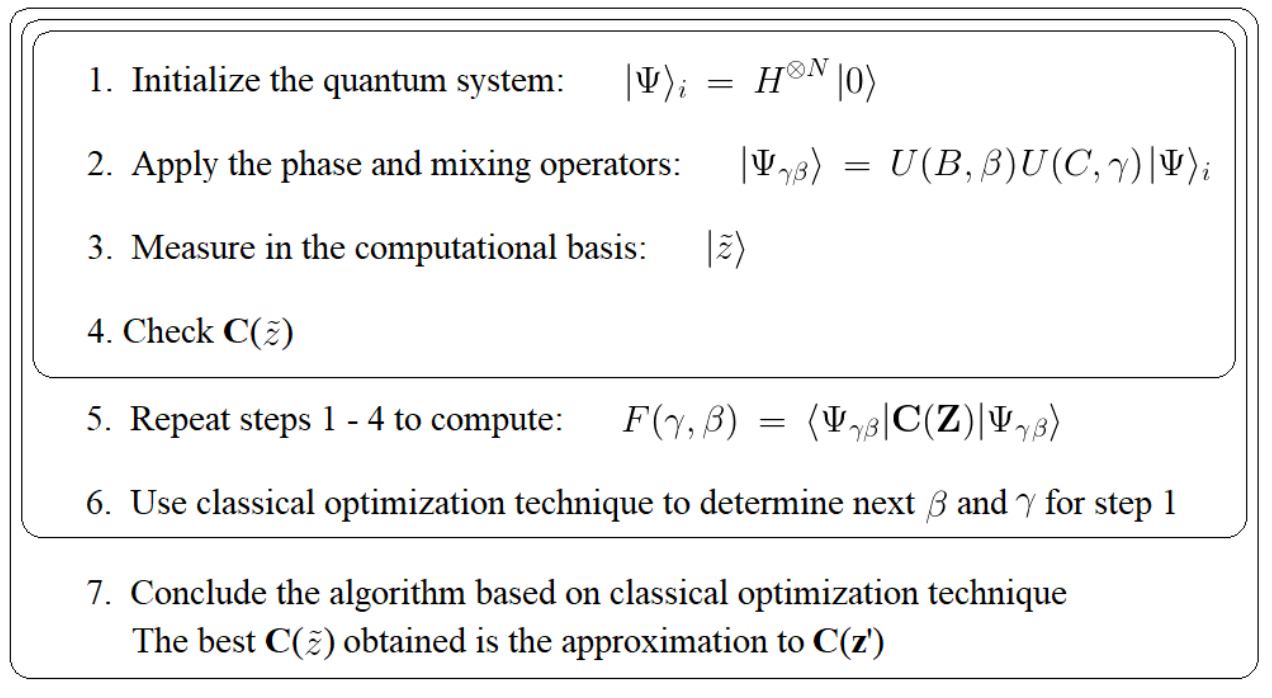

In the diagram above, the different subsections of the algorithm are boxed together to illustrate repetition. Steps 1 - 4 are repeated until a sufficient accuracy
for F(γ,β) is obtained, while steps 1 - 6 are repeated until one reaches a convergence for the classical optimization technique of their choosing. For example,
in the gradient descent technique which we are about to discuss next, the conclusion of the algorithm happens when a minima or maxima is reached.
Importantly however, notice that step 7 is not "you have found the optimal value of the cost function C(z')", but rather an approximation to C(z') based on
the best state we were able to find through measurements. This is an important concept to keep in mind about QAOA: the algorithm does not guarantee that
we will find C(z'), only that we will find the best approximation based on the classical optimization technique we choose.

Once again, it might seem a little discouraging that our QAOA has no guarantee on finding the optimal C(z'), but that doesn't mean it isn't an effective
algorithm. In fact, quite the opposite! In many real-world scenarios where one might look to implement QAOA, finding an approximate solution may be of
tremendous help, especially when we're talking about problems where blindly searching through the space of C(z) may be computationally infeasible. Ideally
one may look to use QAOA to find an approximate solution, which could then be given to a classical computer to finish the problem and find the exact
solution. Thus, the power of QAOA lies in its ability to assist in problems where classical techniques alone fail.

# **Higher Order QAOA Spaces: p**
***

The true role of our mixing operator 𝑈(𝐁 ,𝛽) is to reach as large of a Hilbert Space as necessary for
solving our optimization problem. In achieving this goal however, the typical QAOA approach is to have a mixing operator which is only dependent on a single
free parameter: 𝛽. A 2-qubit example, our quantum circuit of four free parameters wouldn't be even enough to explore the full Hilbert
Space. The motivation for simplifying the mixing operator down to a single free parameter stems from the fact that ultimately QAOA requires a classical optimization technique for 𝛾 and 𝛽. . More free parameters may improve our ability to find a quantum state with a highly probable |z'⟩
component, but it
comes at the cost of slowing down the algorithm as a whole.


Despite our desire to keep things to a minimum, sometimes the complexity of a problem demands more than just the two parameters 𝛾 and 𝛽. For cases such
as these, rather than altering the mixing operator to incorporate more free parameters, the standard QAOA approach is to simply invoke more applications of 𝑈(𝐂,𝛾) and 𝑈(𝐁 ,𝛽) in succession. This effectively increases the space of our search, which in turn will hopefully lead to a better final approximation. By
applying p rounds of our phase and mixing operators, we can create $|Ψ_{γβ}⟩$ states which were previously unobtainable with only a single application of 𝑈(𝐂,𝛾) and 𝑈(𝐁 ,𝛽)

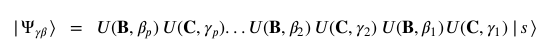

The number of phase and mixing operators is denoted by the parameter 𝑝, which in turn gives us a 2𝑝 -dimensional space of parameter values to search
through. While increasing our search space opens up the opportunity for finding better $|Ψ_{𝛾𝛽}⟩$ states, as we already pointed out, it also comes at the cost of
more states for our classical optimization techniques to handle. The tradeoff between choosing the smallest 𝑝 versus increased algorithm accuracy is
something that needs to be considered on a case-to-case basis. Additionally, if a particular mixing operator isn't producing satisfactory results, we need to
consider whether increasing 𝑝 will remedy the problem, or if a new 𝑈(𝐁,𝛽) altogether is necessary.


It is important to note that in many problems increasing p will lead to better results, the unfortunate issue is that oftentimes there is no way of knowing
beforehand. Classically, optimizing 2 versus 2p variables can have dramatic runtime costs, which is why we must be cautious in choosing the order . Using
QAOA to solve optimization problems is a very case by case technique, which can be viewed as both a good and bad thing. On the one hand, it would be
nice if we had mixing operators which were guaranteed to always solve certain optimization problems, but in reality the strength of QAOA lies in its flexibility.
Because we essentially have limitless possibilities in the way in which we can construct mixing operators, QAOA can be adapted to solve a much larger
breadth of problems than typical quantum algorithms.


To complete our discussion above before moving on to the next topic, we will now look to upgrade our mixing operator. Below is the
quantum circuit for our new 𝑈(𝐁,𝛽) operator, which once again only depends on a single parameter, but now incorporates CNOT gates as well as additional
rotational operators:

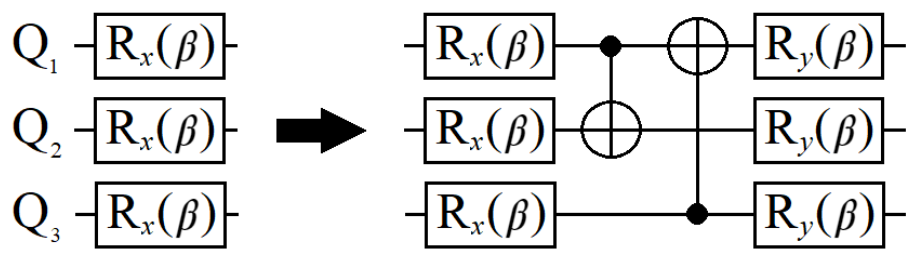

# **The MaxCut Problem**
***

With the workflow and motivation for QAOA now laid out for us, it is time to code up one full example. As mentioned earlier, the most promising aspect
about QAOA for near term quantum computers is its flexibility. The algorithm can tackle a wide array of problems through the encoding of cost functions into 𝑈(𝐂,𝛾), while simultaneously offering limitless possibilities for finding the optimal solution through 𝑈(𝐁,𝛽) and the order p. Additionally, and perhaps most
importantly, QAOA synchronizes with the best already known classical optimization techniques, which means that the algorithm only gets stronger as better
classical optimizers are developed.

As our final example in this lab series, we will cover one additional graph optimization problem, which was the example demonstrated in the original QAOA
paper: the MaxCut problem. The MaxCut problem asks us to find the configuration of our system which maximizes
the number of edges containing neighboring spin-up and spin-down particles. Below is an example graph, with several possible configurations and their
accompanying cut values:

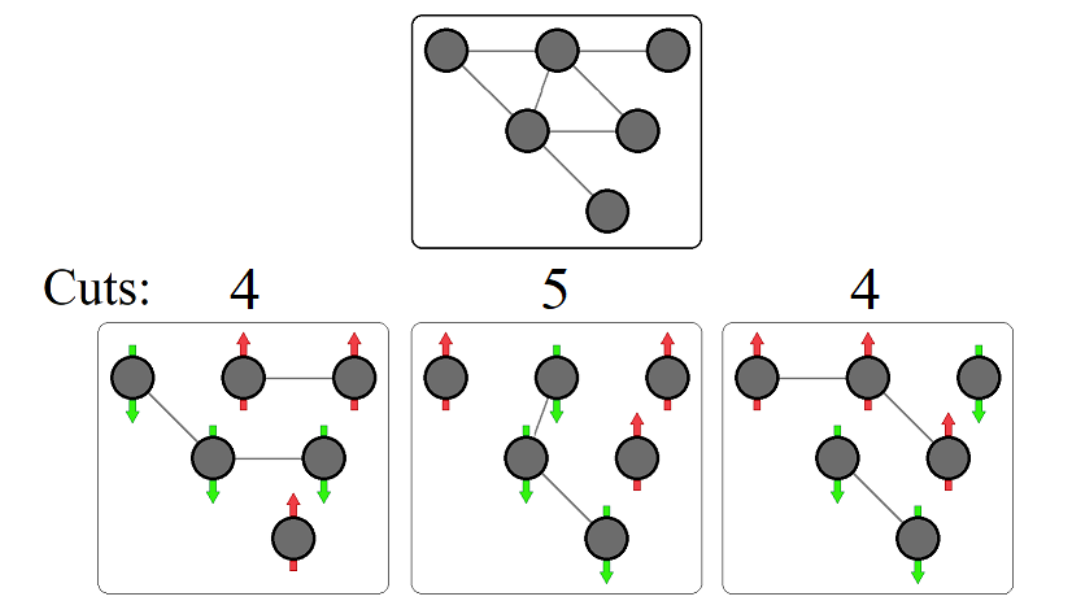

As shown in the figures, the energy value associated with each configuration is based on the number of 'cuts' made when every particle in the system is
assigned a value of either spin up or down. Specifically, the number of cuts for a particular configuration is equivalent to the number of instances of adjacent
particles (sharing a graph connection) with opposite spin. How we define energy for this problem can be done one of two ways: define a cut on the graph as +1 and -1. Based on this choice, our problem then becomes either a maximization or minimization problem, whereby we're looking for either the largest or
smallest possible energy configuration. Here we are going to take the
maximization approach to once again demonstrate the flexibility of QAOA. As such, our cost function for this problem then is defined as follows:

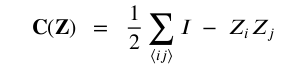

In analyzing the cost function shown above, we once again find the familiar $Z_i Z_j$ term, which produces a negative energy contribution when
particles i and j have the same spin. Specifically, when two particles have opposite spins, their contributing quantity in the cost function results in a +1: $\frac{1}{2}(1-(-1)(+1))$. Conversely, neighbors with the same spin will result in a value of -1, which for this problem is the event which we're trying to minimize. All together, the phase operator for this optimization problem is:

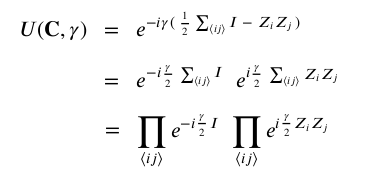

We have a summation of $𝑍_𝑖 𝑍_𝑗$ over all nearest neighbors, which we know how to implement in our
quantum circuit. As for the second term however, we have an exponentiation of $ 𝐼_𝑖 ⊗ 𝐼_𝑗 $, which results in the following matrix operator:

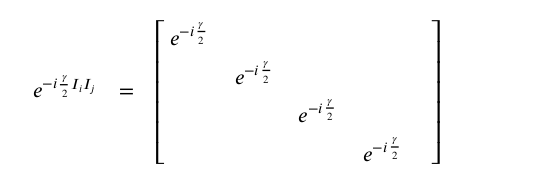

Now, this operation essentially places an $𝑒^{−𝑖\frac{γ}{2}}$ phase on every term corresponding to the 𝑖𝑡ℎ and 𝑗 𝑡ℎ qubits. Mathematically, this is equivalent to applying a
global phase when the states of $𝑄_𝑖$ and $𝑄_𝑗$ are separable, which we've already demonstrated has no measurable effect on a quantum system:

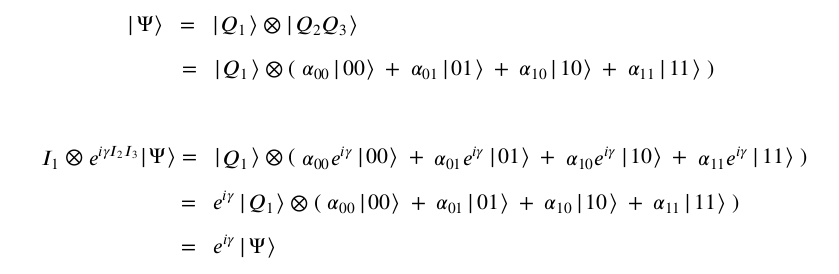

Thus, if the $I_i I_j$
component of our phase operator has no meaningful impact on the quantum system, we can simply drop it from our quantum circuit. You
may be wondering however, in light of our discussions earlier regarding full Hilbert Spaces, can we still ignore this Identity term if our system is in an
entangled state? For our QAOA problem here, yes, but in general, no. If our system is no longer separable, then the phases can no longer be pulled out as a
global phase, which in turn means that we have fundamentally changed our quantum state. However, the reason why we can still drop the phase gates corresponding to the $I_i I_j$
terms from our quantum circuit is because they have no impact on the final answer. That is to say, if we remove the Identity terms
from the cost function, the configuration corresponding to the optimal energy will still be the same, even if the numeric value is different. With or without the
Identity terms, the maximum energy state is going to correspond to the same configuration of spins, which means our QAOA is going to end up searching for
the same |z'⟩. It may feel a bit weird, but the important thing to remember here is that we aren't implementing C(Z), but rather the operator U(C,γ). So long
as our phase operator correctly encodes a cost function which will solve our optimization problem, dropping components of C(Z) which are inconsequential is
perfectly okay.


When implementing this MaxCut Problem into a quantum circuit, out 𝑈(𝐂,𝛾) operator is once again just the exponentiation of nearest neighbor $𝑍_𝑖 𝑍_𝑗$ terms, which we already have the circuit construction for. Similarly, our mixing operator 𝑈(𝐁,𝛽) can be either of the constructions laid out earlier (or any new construction of our choosing), which means we have everything we need to run QAOA. In fact, you may be wondering why we didn't start with this problem,
considering it has the simplest cost function we've studied so far. The motivation for saving MaxCut for last is because it is simple enough such that we can
practice incorporating everything we've covered in this lesson into a single working example: namely a higher order p and the gradient descent algorithm
(ascent in this case). Below is the example geometry we will look to solve, as well as its corresponding code implementation.

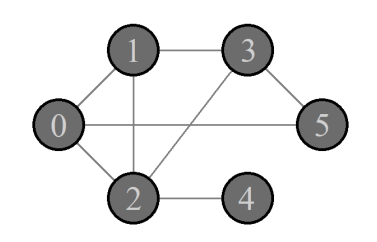

In [11]:
def MaxCut_Energy(V, E):
  '''
  Input:V (array) , E (array)
  Calculates and returns the energy for each state according to the MaxCut Energy function
  '''
  Energies = []
  States = []
  for s in np.arange( 2**len(V) ):
    B = Binary(int(s),2**len(V),'L')
    B2 = []
    for i in np.arange(len(B)):
      if( B[i] == 0 ):
        B2.append(1)
      else:
        B2.append(-1)
    state = ''
    for s2 in np.arange(len(B)):
      state = state+str(B[s2])
    States.append(state)
    energy = 0
    for j in np.arange( len(E) ):
      energy = energy + 0.5* ( 1.0 - B2[int(E[j][0])]*B2[int(E[j][1])] )
    Energies.append(energy)
  return Energies,States

In [12]:
def p_Gradient_Ascent(qc, q, Circ, V, E, p, Beta, Gamma, epsilon, En, step):
  '''
  Input: qc (QuantumCircuit),q (QuantumRegister),Circ (MaxCut_Circuit function),V (array), E (array), p (integer), Beta (array)
  ,Gamma (array), epsilon (float), En (array), step (float)
  Computes the next values for beta and gamma using gradient descent, for a p-dimensional QAOA of the MaxCut Energy Model
  '''
  params = []
  for i in np.arange(2):
    for p1 in np.arange(p):
      if( i == 0 ):
        params.append( Beta[p1] )
      if( i == 1 ):
        params.append( Gamma[p1] )
  ep_params = []
  for p2 in np.arange( len( params ) ):
    for i2 in np.arange( 2 ):
      ep = []
      for p3 in np.arange( len(params) ):
        ep.append( params[p3] )
      ep[p2] = ep[p2] + (-1.0)**(i2+1)*epsilon
      ep_params.append( ep )
  ev = []
  for p4 in np.arange( len( ep_params ) ):
    run_params = ep_params[p4]
    q = QuantumRegister(len(V))
    qc= QuantumCircuit(q)
    for hh in np.arange(len(V)):
      qc.h( q[int(hh)] )
    for p5 in np.arange(p):
      Circ( qc, q, V, E, run_params[int(p5)], run_params[int(p5+p)] )
    ev.append( E_Expectation_Value( qc, En ) )
  Beta_next = []
  Gamma_next = []
  for k in np.arange( len( params ) ):
    if( k < len( params )/2 ):
      Beta_next.append( params[k] - (ev[int(2*k)] - ev[int(2*k+1)])/( 2.0*epsilon ) * step )
    else:
      Gamma_next.append( params[k] - (ev[int(2*k)] - ev[int(2*k+1)])/( 2.0*epsilon ) * step )
  return Beta_next, Gamma_next

In [13]:
def Ub_Mixer1(qc, q, beta, Vert):
  '''
  Input: qc (QuantumCircuit), q (QuantumRegister), beta (float), Vert (array)
  Applies the neccessary gates for a U(B,beta) operation using only Rx gates
  '''
  for v in np.arange( len(Vert) ):
    qc.rx( beta, q[int(v)] )


def Ub_Mixer2(qc, q, beta, Vert):
  '''
  Input: qc (QuantumCircuit), q (QuantumRegister), beta (float), Vert (array)
  Applies the neccessary gates for a U(B,beta) operation using Rx, Ry, and CNOT gates
  '''
  for v in np.arange( len(Vert) ):
    qc.rx( beta, q[int(Vert[v][0])] )
  qc.cx( q[0], q[1] )
  qc.cx( q[2], q[0] )
  for v2 in np.arange( len(Vert) ):
    qc.ry( beta, q[int(Vert[v2][0])] )

In [14]:
def Uc_MaxCut(qc, q, gamma, edge):
  '''
  Input: qc (QuantumCircuit), q (QuantumRegister), gamma (flaot), edge (array)
  Applies the neccessary gates for a U(C,gamma) operation for a MaxCut Energy Model
  '''
  for e in np.arange( len(edge) ):
    qc.cx( q[int(edge[e][0])], q[int(edge[e][1])] )
    qc.rz( gamma, q[int(edge[e][1])] )
    qc.cx( q[int(edge[e][0])], q[int(edge[e][1])] )

In [15]:
def MaxCut_Circuit(qc, q, V, E, beta, gamma):
  '''
  Input: qc (QuantumCircuit), q (QuantumRegister), V (array), E (array), beta (float)
  Constructs the quantum circuit for a given geometry, using the Maxcut Energy Model
  '''
  Uc_MaxCut( qc, q, gamma, E )
  Ub_Mixer1(qc,q,beta,V)

In [16]:
def E_Expectation_Value( qc, Energies ):
  '''
  Input: qc (QuantumCircuit), Energies (array)
  Computes and returns the energy expectation value using the quantum system's wavefunction
  '''
  SV = execute( qc, S_simulator, shots=1 ).result().get_statevector()
  EV = 0
  for i in range( len(SV) ):
    EV = EV + Energies[i] *abs( SV[i] * np.conj(SV[i]) )
  EV = round(EV,4)
  return EV

In [17]:
def Top_States(States, Energies, SV, top):
  '''
  Input: States (array), Energies (array), SV (Qiskit statevector), top (integer)
  Displays the top most probable states in the system, and their associated energy
  '''
  P = []
  S = []
  E = []
  for a in range( top ):
    P.append(-1)
    S.append('no state')
    E.append('no energy')
  for i in range(len(States)):
    new_top = False
    probs = abs(SV[i]*np.conj(SV[i]))*100
    state = States[i]
    energ = Energies[i]
    j = 0
    while( (new_top == False) and (j < top) ):
      if( probs > P[j] ):
        for k in np.arange( int( len(P) - (j+1) ) ):
          P[int( -1-k )] = P[int( -1-(k+1) )]
          S[int( -1-k )] = S[int( -1-(k+1) )]
          E[int( -1-k )] = E[int( -1-(k+1) )]
        P[j] = probs
        S[j] = state
        E[j] = energ
        new_top = True
      j = int(j+1)
  for s in range( top ):
    print('State ',S[s],'Probability: ',round(P[s],2),'%','Energy: ',round(E[s],2))

In [18]:
import random
p = 2
epsilon = 0.001
step_size = 0.01
delta = 0.001
#-------------------------------------------------------
Vert = [ 0,1,2,3,4,5 ]
Edge = [ [0,1],[0,2],[0,5],[1,2],[1,3],[2,3],[2,4],[3,5] ]
#-------------------------------------------------------
Energies,States = MaxCut_Energy( Vert,Edge )
EV = -100
EV_old = -1000
EV_max = -1
#========================================================
beta = []
gamma = []
for pp in np.arange(p):
  beta.append(2*m.pi*random.random())
  gamma.append(2*m.pi*random.random())
s = 0
while( abs( EV - EV_old ) > delta ):
  q = QuantumRegister(len(Vert))
  qc= QuantumCircuit(q)
  for hh in np.arange(len(Vert)):
    qc.h( q[int(hh)] )
  if( s != 0 ):
    beta,gamma = p_Gradient_Ascent(qc,q,MaxCut_Circuit,Vert,Edge,p,beta,gamma,epsilon,Energies,step_size)
  for i in np.arange(p):
    MaxCut_Circuit( qc, q, Vert, Edge, beta[i], gamma[i] )
  #-------------------------------
  EV_old = EV
  EV = E_Expectation_Value( qc, Energies )
  if( EV_old > EV ):
    EV_old = EV
  if( EV > EV_max ):
    Params = [beta,gamma]
    EV_max = EV
  s = int(s+1)
  #-------------------------------
  if( (m.floor( s/10 ) == s/10) or (s == 1) ):
    params_string = ''
    for ps in np.arange(p):
      params_string = params_string + '   \u03B3'+str(int(ps+1))+' = '+str(round(gamma[ps],6))+'    \u03B2'+ str(int(ps+1)) +' = '+ str(round(beta[ps],6))
    params_string = params_string + '   steps: '+str(s)
    print('F(\u03B3,\u03B2): ',EV,'|',params_string)
print('\n _____ Terminated Gradient Ascent _____ \n')
params_string = ''
for ps in np.arange(p):
  params_string = params_string + '   \u03B3' +str(int(ps+1))+' = '+str(round(gamma[ps],6))+'   \u03B2'+str(int(ps+1)) +' = '+ str(round(beta[ps],6))
params_string = params_string+'   steps:' +str(s)
print('F(\u03B3,\u03B2): ',EV,'|',params_string,'\n')
#=========================================================
beta = Params[0]
gamma = Params[1]
p = len( Params[0] )
#------------------------------
q = QuantumRegister(len(Vert))
qc= QuantumCircuit(q)
for hh in np.arange(len(Vert)):
  qc.h( q[int(hh)] )
for i in np.arange(p):
  MaxCut_Circuit( qc, q, Vert, Edge, beta[i], gamma[i] )
SV = execute( qc, S_simulator, shots=1 ).result().get_statevector()
Top_States(States,Energies,SV,12)

F(γ,β):  4.4328 |    γ1 = 3.0004    β1 = 3.216053   γ2 = 5.673575    β2 = 5.084272   steps: 1
F(γ,β):  4.4692 |    γ1 = 3.0144    β1 = 3.227053   γ2 = 5.696075    β2 = 5.134272   steps: 10
F(γ,β):  4.4939 |    γ1 = 3.0204    β1 = 3.236053   γ2 = 5.710575    β2 = 5.180772   steps: 20
F(γ,β):  4.5095 |    γ1 = 3.0204    β1 = 3.243053   γ2 = 5.718075    β2 = 5.218772   steps: 30

 _____ Terminated Gradient Ascent _____ 

F(γ,β):  4.5176 |    γ1 = 3.0194   β1 = 3.246553   γ2 = 5.721575   β2 = 5.242272   steps:37 

State  110110 Probability:  4.64 % Energy:  6.0
State  001001 Probability:  4.64 % Energy:  6.0
State  011000 Probability:  4.31 % Energy:  5.0
State  100111 Probability:  4.31 % Energy:  5.0
State  010000 Probability:  4.05 % Energy:  3.0
State  101111 Probability:  4.05 % Energy:  3.0
State  001000 Probability:  3.05 % Energy:  4.0
State  110111 Probability:  3.05 % Energy:  4.0
State  110010 Probability:  3.0 % Energy:  5.0
State  001101 Probability:  3.0 % Energy:  5.0
State 

The cell of code above represents starting our p = 2
gradient ascent from a random location in the parameter space. For completeness, the mixing operator
implemented in this coding exercise corresponds to the first U(B,β) we studied (only $R_x$
gates on all the qubits). Based on the energies printed at the end of
the code, we can conclude that the true global maximum to our problem corresponds to +7
(you can verify for yourself that these are indeed the optimal
configurations), which is quite a ways off from the 5.76
we terminated at. Nevertheless, the probability distribution shows that our local maxima has the two
optimal configurations as the most probable states, which means that we can consider this run of QAOA as a success.

Since this is our first time running QAOA with an order p greater than 1, it would be insightful to know what kind of solutions we could have expected from p = 1:

Energy Expectation Value:  5.2934 γ =  5.6549 β =  0.6912 



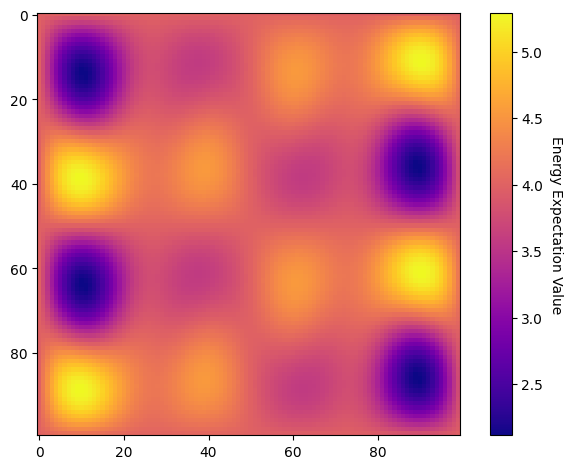

State  100110 Probability:  9.0 % Energy:  7.0
State  011001 Probability:  9.0 % Energy:  7.0
State  101100 Probability:  5.55 % Energy:  6.0
State  010011 Probability:  5.55 % Energy:  6.0
State  001001 Probability:  3.9 % Energy:  6.0
State  110110 Probability:  3.9 % Energy:  6.0
State  100100 Probability:  3.39 % Energy:  6.0
State  011011 Probability:  3.39 % Energy:  6.0
State  010110 Probability:  2.92 % Energy:  5.0
State  101001 Probability:  2.92 % Energy:  5.0
State  110010 Probability:  2.92 % Energy:  5.0
State  001101 Probability:  2.92 % Energy:  5.0


In [19]:
size = 100
#-------------------------------------------------------
Vert = [ 0,1,2,3,4,5 ]
Edge = [ [0,1],[0,2],[0,5],[1,2],[1,3],[2,3],[2,4],[3,5] ]
#-------------------------------------------------------
Energies,States = MaxCut_Energy( Vert,Edge )
EV_grid = np.zeros(shape=(size,size))
EV_max = -1
#========================================================
for b in range(size):
  beta = round(2*m.pi*(b/size),4)
  for g in range(size):
    gamma = round(2*m.pi*(g/size),4)
    q = QuantumRegister(len(Vert))
    qc= QuantumCircuit(q)
    for hh in range(len(Vert)):
      qc.h( q[int(hh)] )
    MaxCut_Circuit( qc, q, Vert, Edge, beta, gamma )
    EV = E_Expectation_Value( qc, Energies )
    EV_grid[b,g] = EV
    if( EV > EV_max ):
      Params = [beta,gamma]
      EV_max = EV
print('Energy Expectation Value: ',EV_max,'\u03B3 = ',Params[1],'\u03B2 = ',Params[0],'\n')
#--------------------------------------
fig, ax = plt.subplots()
show_text = False
show_ticks = False
Heatmap(EV_grid, show_text, show_ticks, ax, "plasma", "Energy Expectation Value")
fig.tight_layout()
plt.show()
#======================================
beta = Params[0]
gamma = Params[1]
#--------------------------------------
q = QuantumRegister(len(Vert))
qc= QuantumCircuit(q)
for hh in np.arange(len(Vert)):
  qc.h( q[int(hh)] )
MaxCut_Circuit( qc, q, Vert, Edge, beta, gamma )
SV = execute( qc, S_simulator, shots=1 ).result().get_statevector()
Top_States(States,Energies,SV,12)

Comparing the results between the two runs, which both use the same mixing operator, the plot above shows that the optimal F(γ,β) value for the p = 1
case is around 5.29
. By comparison, this value is lower
than the one we obtained for the p = 2
case where we picked our starting parameters at random.
Thus, this MaxCut problem has demonstrated the solving potential one can obtain through increasing the order of p, effectively unlocking new sections of the
problem's Hilbert Space. I encourage you to try higher values of p and other mixing operators, as well as various values for ϵ and step_size
to see the
different kinds of solutions QAOA can produce!

For our QAOA lesson here, the real workhorse that powers the algorithm is the way in which we are able to convert
classical optimization problems into the
[ 𝛾 , 𝛽 ]
space through the phase and mixing operators. The speedup potential for this algorithm effectively comes from converting a search through classical graph combinations to one through $|Ψ_{𝛾𝛽}⟩$ states. For certain problems where the best classical technique is simply an exhaustive search, QAOA allows us to convert the problem to a space where better classical optimizers can be implemented.

# **References**
***
1. [A Quantum Approximate Optimization Algorithm - Edward Farhi, Jeffrey Goldstone, Sam Gutmann](https://arxiv.org/abs/1411.4028)
2. [Solving combinatorial optimization problems using QAOA - Qiskit Notebook](https://learn.qiskit.org/course/ch-applications/solving-combinatorial-optimization-problems-using-qaoa)
